In [1]:
import numpy as np
from scipy.misc import imread
import matplotlib.pyplot as plt
import pandas as pd


G:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


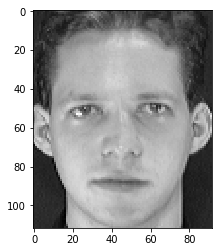

In [2]:
img = imread("s1/1.pgm")
img = img.astype(np.uint8)
img = img / 255
plt.imshow(img,cmap="gray")

Reading face images

In [3]:
from glob import iglob
faces = pd.DataFrame([])
for path in iglob("*/*.pgm"):
    img=imread(path)
    face = pd.Series(img.flatten(),name=path)
    faces = faces.append(face)

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


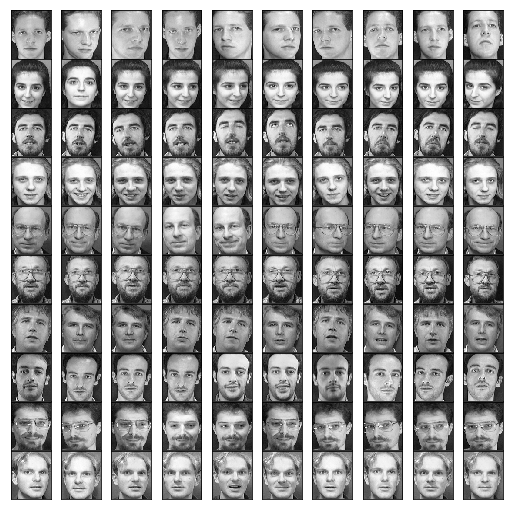

In [4]:
fig, axes = plt.subplots(10,10,figsize=(9,9),
 subplot_kw={"xticks":[], "yticks":[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.iloc[i].values.reshape(112,92),cmap="gray")

# PCA

In [5]:
from sklearn.decomposition import PCA
#n_components=0.80 means it will return the Eigenvectors that have the 80% of the variation in the dataset
faces_pca = PCA(n_components=0.8)
faces_pca.fit(faces)

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

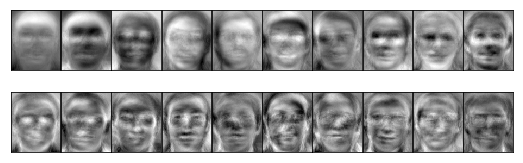

In [6]:
fig, axes = plt.subplots(2,10,figsize=(9,3),
 subplot_kw={"xticks":[], "yticks":[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
 ax.imshow(faces_pca.components_[i].reshape(112,92),cmap="gray")

With these Eigenvectors it is possible to redraw any of the faces on the dataset by executing transform of the PCA object to get the Eigenvectors out, and then inverse_transform on the Eigenvectors to get all the original images:

In [7]:
components = faces_pca.transform(faces)
projected = faces_pca.inverse_transform(components)

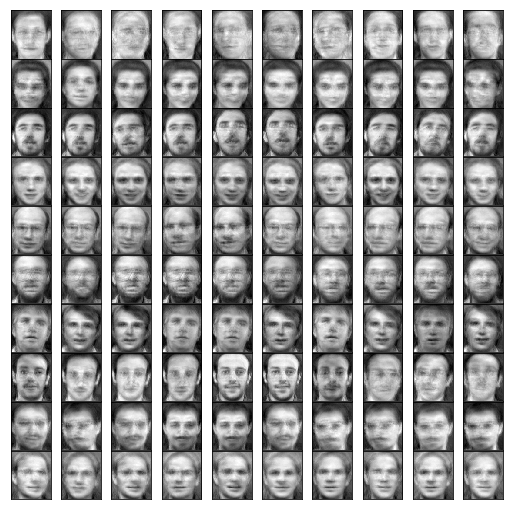

In [8]:
fig, axes = plt.subplots(10,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(112,92),cmap="gray")